<a href="https://colab.research.google.com/github/tanay47/Basic-Linear-Regression-Implementation-using-startups-dataset./blob/main/Basic_Linear_Regression_Implementation_using_startups_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

### <u> Tasks </u>
* ### Validate all the assumptions
* ### Compute all the regression evaluation metrics
* ### Comment on the best evaluation metrics for this problem

### First linear regression by me.

In [27]:
# importing relavent librarys.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [4]:
# mount notebook to drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# import data.
start_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 4/Module 4.3/50_Startups.csv")

In [6]:
start_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
start_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
start_df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


###Deciding our independent variables.

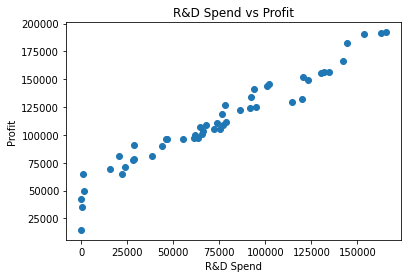

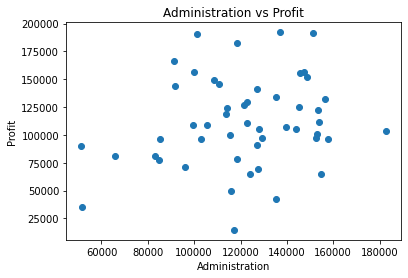

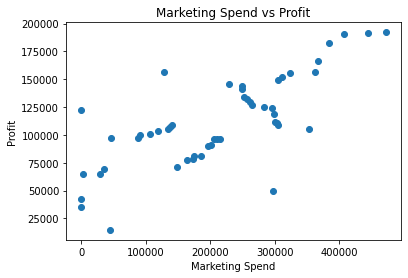

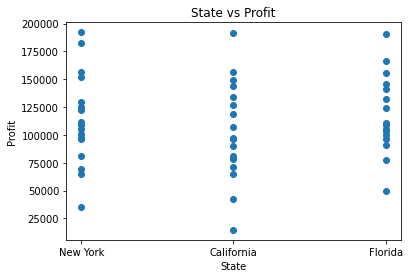

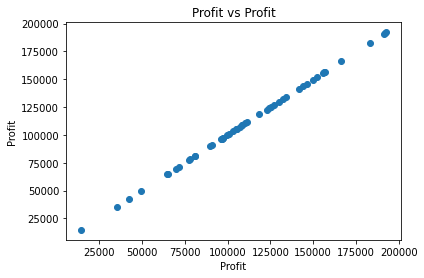

In [32]:
# Checking using scatterplots.
for i in start_df.columns:
  plt.scatter(start_df[i],start_df["Profit"])
  plt.title(f"{i} vs Profit")
  plt.xlabel(i)
  plt.ylabel('Profit')
  plt.show()

###We can clearly conclde that we will use every variable as dependent variable expect "profit" and "administration"

In [38]:
# Checking for differnt states.
start_df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

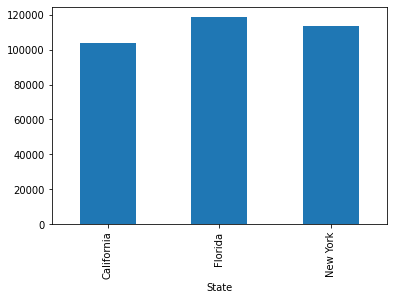

In [55]:
# Plot a bar graph.
start_df.groupby(["State"])["Profit"].mean().plot.bar()


###Considering the above graph we clearly see that states affect profit with certen degree.

In [56]:
# Using one-hot encoding for "State" variable.
start_df['NewYork_State'] = np.where(start_df['State']=='New York', 1, 0)
start_df['California_State'] = np.where(start_df['State']=='California', 1, 0)
start_df['Florida_State'] = np.where(start_df['State']=='Florida', 1, 0)

In [58]:
start_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,New York,192261.83,1,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,1


###Looking good, now we just remove unwanted variables form our analysis.

In [61]:
# Dropping unwanted variables.
start_df.drop(["Administration","State"], axis=1, inplace=True)

In [62]:
start_df.head()

,R&D Spend,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,471784.10,192261.83,1,0,0
1,162597.70,443898.53,191792.06,0,1,0
2,153441.51,407934.54,191050.39,0,0,1
3,144372.41,383199.62,182901.99,1,0,0
4,142107.34,366168.42,166187.94,0,0,1


###All right, we are ready to split our dataset into train and test and pass to our linear algorithm. 

In [63]:
# Seperating our independent and dependent variables.
dependent_var = "Profit"

In [67]:
independent_var = list(set(start_df.columns.tolist()) - {dependent_var})
independent_var

['Florida_State',
 'R&D Spend',
 'Marketing Spend',
 'NewYork_State',
 'California_State']

In [75]:
# Independent and dependent variables seperation.
x = start_df[independent_var].values
y = start_df[dependent_var].values

In [76]:
# Train-Test split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [78]:
# Data transformation/Scaling of data between 0 and1 1.
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [79]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [80]:
regressor.intercept_

46238.456569909424

In [81]:
regressor.coef_

array([-7.35864550e+02,  1.29822555e+05,  1.60200907e+04,  6.45260941e+02,
        9.06036086e+01])

In [83]:
y_pred_train = regressor.predict(x_train)
y_pred_train

array([ 96361.43318778,  89989.88386646, 109198.28848533,  89938.0350013 ,
       127553.092641  , 158802.77642512, 148385.28937022,  47733.69042439,
        47309.30357925, 102031.35068094, 145689.96032843,  97271.53356198,
        97678.8907026 , 116556.64850718,  69916.12579558, 116340.71767865,
        60264.52556509, 152107.944923  , 127135.71526306, 101784.73587   ,
       162747.23958494, 130798.20963097,  74772.8035081 ,  47862.97477887,
       189064.49467032, 127682.58643316,  87620.62666179, 112147.59863856,
       156358.07734503, 108874.04821501,  74837.24899217, 118608.56062194,
       114735.4291788 , 153520.49826121,  82545.301577  ,  56624.35268823,
       173248.59990448, 192726.36307275,  46329.06017855,  64703.87420074])

In [84]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [86]:
# Predicting for unseen data.
y_pred_test = regressor.predict(x_test)
y_pred_test

array([101374.28367856, 133851.24216011, 133300.28408632,  72987.3207314 ,
       179827.91205673, 115491.25395905,  69057.74881974,  97880.01360636,
       113898.43876002, 169510.75518372])

In [87]:
# Actual y-values.
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

### Let's evaluate our fitted line.


In [93]:
# MSE and RMSE TRAIN SET
mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = np.math.sqrt(mean_squared_error(y_train,y_pred_train))
print(f" MSE = {mse_train}, and RMSE = {rmse_train} for traning data")

 MSE = 82158239.56230992, and RMSE = 9064.118245163725 for traning data


In [94]:
# MSE and RMSE TEST SET
mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = np.math.sqrt(mean_squared_error(y_test,y_pred_test))
print(f" MSE = {mse_test}, and RMSE = {rmse_test} for traning data")

 MSE = 70726699.14472999, and RMSE = 8409.916714494264 for traning data


In [95]:
# R-Sq value for train.
r2_score(y_train, y_pred_train)

0.9498261378977877

In [96]:
# R-Sq value for test.
r2_score(y_test,y_pred_test)

0.9446968769427515

###Regression line fits well to both traning and test dataset.